# 4-17 Problem

The goal of these problems is to apply what we have learned in the demo about box-counting dimension to Julia sets.

## Problems 

1. First we need our approximation to the Julia set we will use. The best choice for this problem is probably the back_iterates of a large radius circle - since this tends to the boundary of the Julia set.

        load('SHPChaos.sage')
        c = _____ #pick your favorite
        n = 10 
        starting_points = 20
        L = circle_points(radius = 15, num_points = starting_points)
        points = back_iterates_n(L, c, n , tolerance = 0.01)[n-1]
        list_plot(points)
     
2. Use the code from the demo to estimate its box dimension: follow the steps that were done in the demo but with this list instead of `sierpinski(10)`

3. How does the fractal dimension change as we vary c? What is the difference in fractal dimension when c is a) inside $M$, b) outside $M$?

## A Solution

First we will walk through a specific example and then we will combine all the code into a method that does this for any value of $c$. 

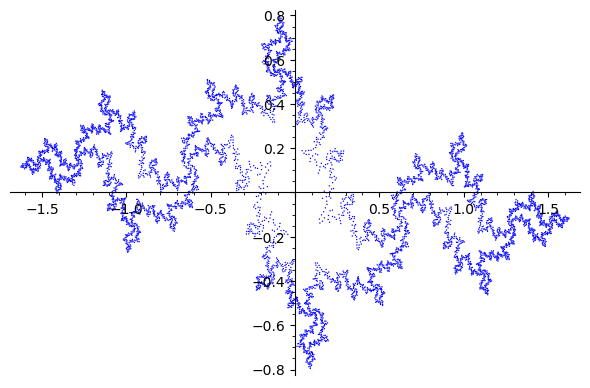

In [12]:
load('SHPChaos.sage')
c = -1 + 0.26*I #pick your favorite
n = 38
starting_points = 20
L = circle_points(radius = 15, num_points = starting_points)
points = back_iterates_n(L, c, n , tolerance = 0.005)[n-1]

def box_array(level, points, xmin = 0, xmax = 1, ymin = 0, ymax = 1):
    """
    Returns a 2^level by 2^level array of 0s or 1s, 
    with a 1 in box (i,j) if there is a point in the box (i,j). Note that this could be done way more efficiently by storing the columns or rows as binary numbers. 
    """
    width = xmax - xmin
    height = ymax - ymin
    array = [[0 for j in range(2^level)] for i in range(2^level)]
    lx = len(array)
    ly = len(array[0])
    for p in points:
        px = (p[0] - xmin)/width #-1/(2^(level + 2)) # rescale to within [0,1]
        py = (p[1] - ymin)/height# -1/(2^(level + 2))
        i = int(px*2^level)
        j = int(py*2^level)
        array[i][j] = 1
    return(array)

list_plot(points, size = 1)



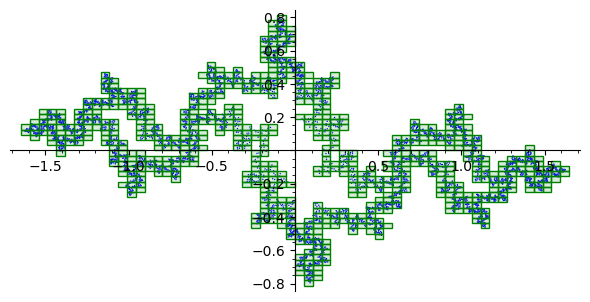

In [13]:
pt_coords = [(z.real(), z.imag() ) for z in points]
B = box_array(6,pt_coords, xmin = -1.7, xmax = 1.7, ymin = -1.0, ymax = 1.0)
plt = box_array_plot(B, xmin = -1.7, xmax = 1.7, ymin = -1, ymax = 1 )
show(plt + list_plot(points, size = 1))

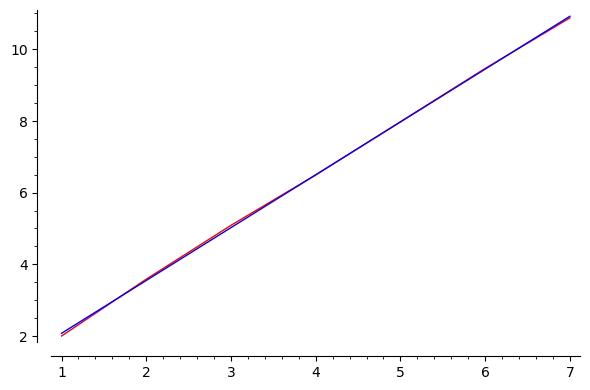

In [36]:
data = []
for i in range(1,8):
    x = i   # The way we have set it up, this is already equal to log_2(1/ϵ), since number of boxes along x axis is 2^i. 
    y = numerical_approx(log(number_of_ones(box_array(i, pt_coords, xmin = -1.7, xmax = 1.7, ymin = -1.0, ymax = 1.0)), 2))
    data.append((x,y))

t = var('t')
a,b = var('a,b')
model(x) = a*x + b
fit = find_fit([[x,y] for (x,y) in data], model , solution_dict = True)
fit
show(list_plot(data, plotjoined = True, color = 'red') + plot(fit[a]*t + fit[b], (t,1,7)))

In [33]:
fit[a]

1.5447151268705417

So we plotted $log(1/\epsilon)$ against $N(\epsilon)$ and did regression, and in the end it turns out that the slope 1.544 is an excellent fit. So we'll say this is our candidate for the dimension! Note that the dimension is larger than $1$, showing that it somehow is somehwere between an ordinary curve and something that fills out space.  Now let's plot this for a value $c$ outside of $M$. There we expect $J$ to be somewhere between a collection of points of dimension $0$ and something one dimensional. 

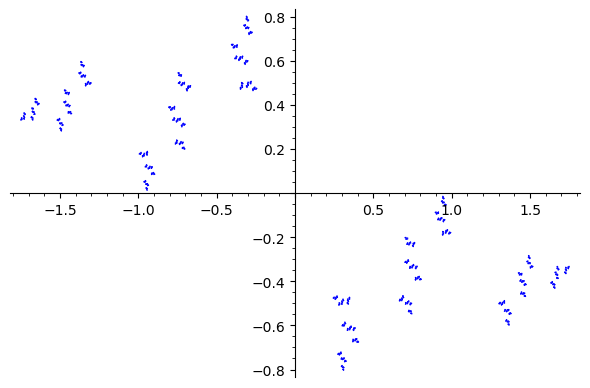

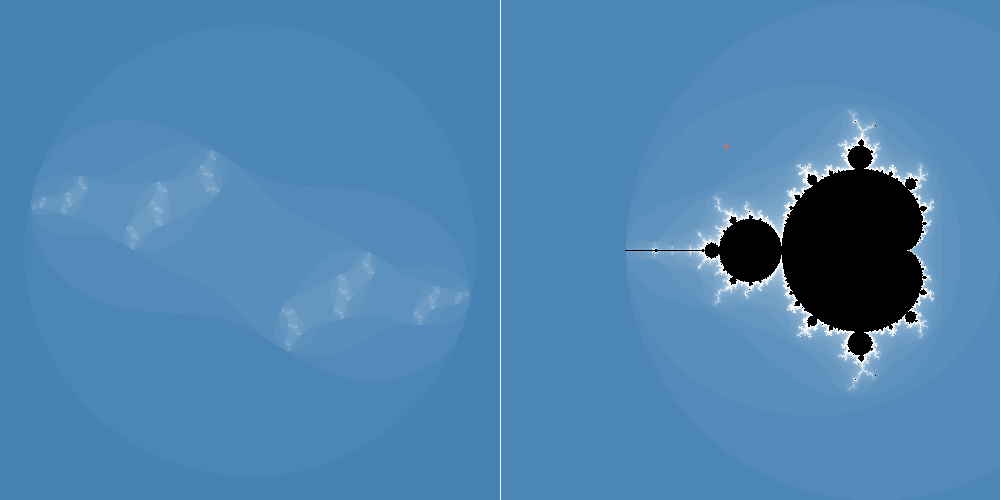

In [55]:
c = -1.2 + 0.83*I #pick your favorite
n = 40
starting_points = 20
L = circle_points(radius = 15, num_points = starting_points)
points = back_iterates_n(L, c, n , tolerance = 0.002)[n-1]

show(list_plot(points, size = 1))
z = var('z')
julia_plot(z^2 + c)

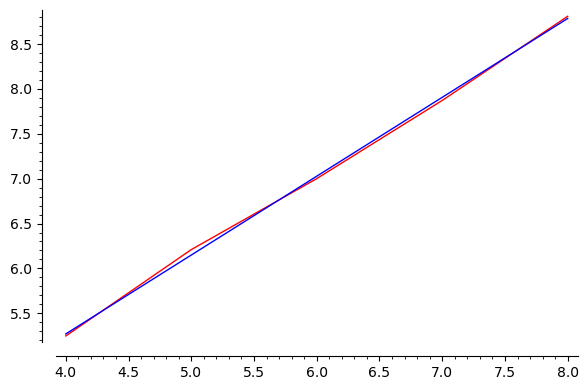

0.8779766181095778

In [57]:
pt_coords = [(z.real(), z.imag() ) for z in points]
data = []
for i in range(4,9):
    x = i   # The way we have set it up, this is already equal to log_2(1/ϵ), since number of boxes along x axis is 2^i. 
    y = numerical_approx(log(number_of_ones(box_array(i, pt_coords, xmin = -1.8, xmax = 1.8, ymin = -1.0, ymax = 1.0)), 2))
    data.append((x,y))

t = var('t')
a,b = var('a,b')
model(x) = a*x + b
fit = find_fit([[x,y] for (x,y) in data], model , solution_dict = True)
fit
show(list_plot(data, plotjoined = True, color = 'red') + plot(fit[a]*t + fit[b], (t,4,8)))
fit[a]

So we've found a value less than 1. It turns out that for $c$ outside of $M$, the fractal dimension is actually less than $1$, but greater than $0$ (which is the *classical* dimension of a collection of points. )
